# <span style='background-color: #fff5b1'>오늘의 한 걸음  🚶🏽‍♂️: 인물 사진 멋지게 만들기</span>

## Contexts

### 1. READY
    1-1 오늘의 Exp와 Rubric  
    1-2 사용하는 라이브러리  

### 2. GAME
    2-1. 사람 이미지 블러처리
    2-2. 고양이의 경우
    2-3. 크로마키의 경우
    2-4. 문제점 확인 및 해결방안 도출

### 3. POTG (best Play Of The Game
    3-1. 소감(POTG)  
    3-2. 어려웠던 점과 극복방안  
    3-3. 추후  

---


# 1. Ready
## 1-1. 오늘의 Exp와 Rubric


오늘의 Exploration 은 이미지에 셸로우 포커스 기법을 적용하는 것이다.  
셸로우 포커스는 쉽게 표현에 인물에 초점이 맞추는 기법을 의미한다  

<img src='./human_segmentation/images/me2.PNG'></img>


#### 여기에 이미지 사진 예시 넣기

오늘의 Rubric 은 다음과 같다

|평가기준|상세항목|
|---|---|
|1. 인물모드 사진을 성공적으로 제작하였다.|아웃포커싱 효과가 적용된 본인의 인물모드 사진과 고양이 사진, 배경전환 크로마키사진을 각각 1장 이상 성공적으로 제작하였다.|
|2. 제작한 인물모드 사진들에서 나타나는 문제점을 정확히 지적하였다.|인물사진에서 발생한 문제점을 정확히 지적한 사진을 제출하였다.|
|3. 인물모드 사진의 문제점을 개선할 수 있는 솔루션을 적절히 제시하였다.|추가적인 depth 정보를 활용하여 semantic segmentation mask의 오류를 보완할 수 있는 좋은 솔루션을 구체적으로 제시하였다.|

## 1-2. 사용하는 라이브러리

In [1]:
import os
import cv2
import numpy as np
from matplotlib import pyplot as plt

from pixellib.semantic import semantic_segmentation # segmentation 모델
import urllib #웹에서 데이터 다운 시 사용




os : 로컬의 경로를 불러온다.  
cv2 : 이미지 처리 라이브러리  
np : 배열 데이터 처리 라이브러리  
metplotlib : 시각화 라이브러리  
  
#### 중요
- sementic_segmentation : 우리가 학습시킬 모델   
- url lib : 웹에서 데이터를 다운로드 받을 수 있다.  
우리의 경우 사람을 적절하게 불러올 수 았는 Pixel Lib 의 학습데이터를 불러온다.


# 2. GAME
## 2-1. 사람 이미지 블러처리

<img src=''></img>

우리가 사용할 사진을 가져온다.



<img src='./human_segmentation/images/me.jpg'></img>

(1299, 1050, 3)


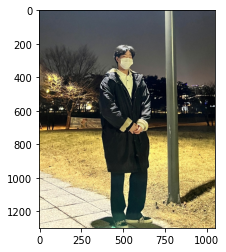

In [73]:
img_path = os.getenv('HOME')+'/aiffel/workplace/[E-07]/human_segmentation/images/me.jpg'  
img_orig = cv2.imread(img_path) 

print(img_orig.shape)

plt.imshow(cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB))
plt.show()

cv2 라이브러리를 사용할 때는 꼭 cvtColor(img, cv2.COLOR_BGR2RGB) 과정을 거칠 것.

In [74]:
model_dir = os.getenv('HOME')+'/aiffel/workplace/[E-07]/human_segmentation/models' #경로 설정
model_file = os.path.join(model_dir, 'deeplabv3_xception_tf_dim_ordering_tf_kernels.h5') #해당 경로 안에 있는 파일 설정

# PixelLib가 제공하는 모델의 url
model_url = 'https://github.com/ayoolaolafenwa/PixelLib/releases/download/1.1/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5'

# 다운로드를 시작합니다
urllib.request.urlretrieve(model_url, model_file)

('/aiffel/aiffel/workplace/[E-07]/human_segmentation/models/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5',
 <http.client.HTTPMessage at 0x7f2834de1b50>)

가져온 데이터를

우리가 생성한 모델에 끌어 와 학습시킨다.

In [75]:
model = semantic_segmentation()
model.load_pascalvoc_model(model_file) #우리가 가져온 학습 데이터를 모델에 입력

학습된 모델로 우리의 Img 에서 segmentation 합니다.

In [76]:
segvalues, output = model.segmentAsPascalvoc(img_path)

학습을 마친 결과는 두가지 데이터가 나옵니다.  
segvalues 는 사진 판단에 따른 설명이 들어가고,  
output 에는 사진의 픽셀 값이 들어갑니다.  

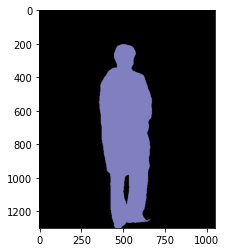

In [77]:
plt.imshow(output)
plt.show()

In [78]:
LABEL_NAMES = [
    'background', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus',
    'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike',
    'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tv'
]
len(LABEL_NAMES)

segvalues

{'class_ids': array([ 0, 15]),
 'masks': array([[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]])}

In [79]:
for class_id in segvalues['class_ids']:
    print(LABEL_NAMES[class_id])

background
person


In [80]:
colormap = np.zeros((256, 3), dtype = int)
ind = np.arange(256, dtype=int)

for shift in reversed(range(8)):
    for channel in range(3):
        colormap[:, channel] |= ((ind >> channel) & 1) << shift
    ind >>= 3

colormap.shape

(256, 3)

In [81]:
colormap[15]

array([192, 128, 128])

In [82]:
seg_color = (128,128,192)

(1299, 1050)


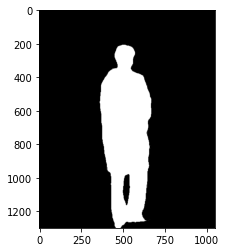

In [83]:
seg_map = np.all(output==seg_color, axis=-1)
print(seg_map.shape)
plt.imshow(seg_map, cmap='gray')
plt.show()

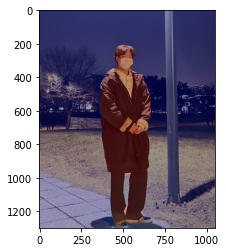

In [84]:
img_show = img_orig.copy()

# True과 False인 값을 각각 255과 0으로 바꿔줍니다
img_mask = seg_map.astype(np.uint8) * 255

# 255와 0을 적당한 색상으로 바꿔봅니다
color_mask = cv2.applyColorMap(img_mask, cv2.COLORMAP_JET)

# 원본 이미지와 마스트를 적당히 합쳐봅니다
# 0.6과 0.4는 두 이미지를 섞는 비율입니다.
img_show = cv2.addWeighted(img_show, 0.6, color_mask, 0.4, 0.0)

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

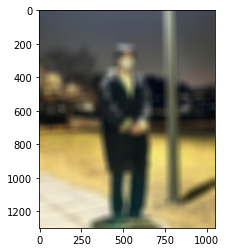

In [16]:
img_orig_blur = cv2.blur(img_orig, (50,50))  
plt.imshow(cv2.cvtColor(img_orig_blur, cv2.COLOR_BGR2RGB))  
plt.show()

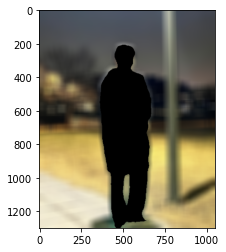

In [17]:
img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR)
img_bg_mask = cv2.bitwise_not(img_mask_color)
img_bg_blur = cv2.bitwise_and(img_orig_blur, img_bg_mask)
plt.imshow(cv2.cvtColor(img_bg_blur, cv2.COLOR_BGR2RGB))
plt.show()

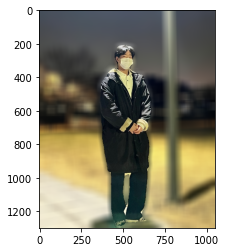

In [18]:
img_concat = np.where(img_mask_color==255, img_orig, img_bg_blur)
plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
plt.show()

이 기술을 이용하면 단순히 사람 뿐만이 아니라  
고양이나 강아지를 위해서도 블러 처리를 해줄 수 있다.  
LABEL_NAMES에 있는 항목을 모두 구별할 수 있기 때문이다.

## 2.2 CAT 의 경우


(960, 1280, 3)


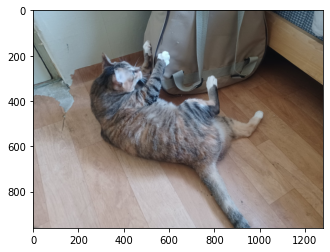

In [24]:
img_path = os.getenv('HOME')+'/aiffel/workplace/[E-07]/human_segmentation/images/cat.jpg'  
img_orig = cv2.imread(img_path) 

print(img_orig.shape)

plt.imshow(cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB))
plt.show()

background
cat


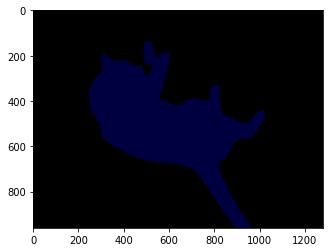

In [26]:
segvalues, output = model.segmentAsPascalvoc(img_path)

for class_id in segvalues['class_ids']:
    print(LABEL_NAMES[class_id])
    
plt.imshow(output)
plt.show()

보시는 바와 person 이 아닌 cat 으로 인식하고 있다.

In [27]:
colormap = np.zeros((256, 3), dtype = int)
ind = np.arange(256, dtype=int)

for shift in reversed(range(8)):
    for channel in range(3):
        colormap[:, channel] |= ((ind >> channel) & 1) << shift
    ind >>= 3

colormap.shape

(256, 3)

In [29]:
colormap[8]

array([64,  0,  0])

고양이는  0,0,64 의 이미지 속성을 가지고 있다.

In [30]:
seg_color = (0,0,64)

(960, 1280)


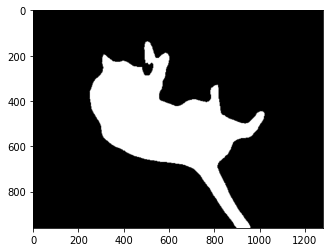

In [31]:
seg_map = np.all(output==seg_color, axis=-1)
print(seg_map.shape)
plt.imshow(seg_map, cmap='gray')
plt.show()

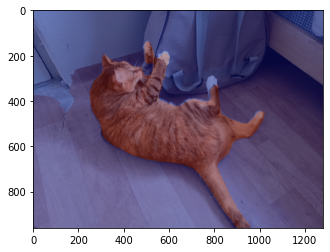

In [32]:
img_show = img_orig.copy()

# True과 False인 값을 각각 255과 0으로 바꿔줍니다
img_mask = seg_map.astype(np.uint8) * 255

# 255와 0을 적당한 색상으로 바꿔봅니다
color_mask = cv2.applyColorMap(img_mask, cv2.COLORMAP_JET)

# 원본 이미지와 마스트를 적당히 합쳐봅니다
# 0.6과 0.4는 두 이미지를 섞는 비율입니다.
img_show = cv2.addWeighted(img_show, 0.6, color_mask, 0.4, 0.0)

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

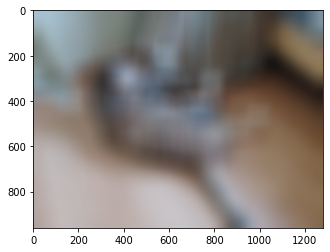

In [36]:
img_orig_blur = cv2.blur(img_orig, (100,100))  
plt.imshow(cv2.cvtColor(img_orig_blur, cv2.COLOR_BGR2RGB))
plt.show()

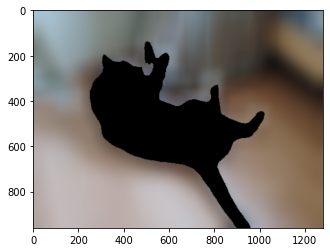

In [37]:
img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR)
img_bg_mask = cv2.bitwise_not(img_mask_color)
img_bg_blur = cv2.bitwise_and(img_orig_blur, img_bg_mask)
plt.imshow(cv2.cvtColor(img_bg_blur, cv2.COLOR_BGR2RGB))
plt.show()

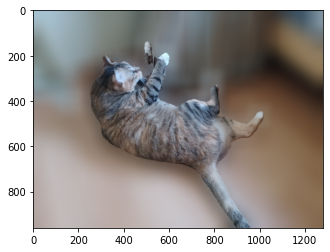

In [38]:
img_concat = np.where(img_mask_color==255, img_orig, img_bg_blur)
plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
plt.show()

## 2-3. 크로마키의 경우

나를 바다에 옮겨보도록 하겠다.

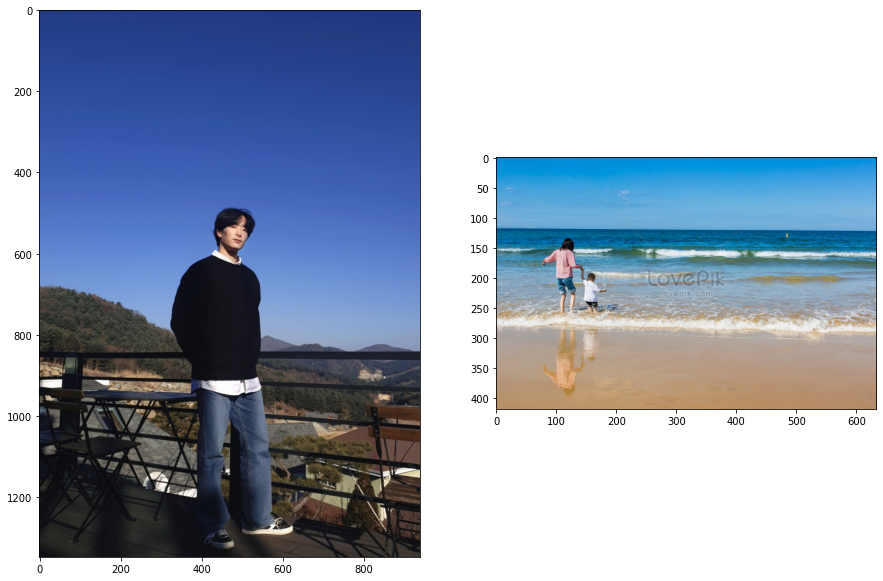

In [59]:
img_path = os.getenv('HOME')+'/aiffel/workplace/[E-07]/human_segmentation/images/me4.jpg'  
img_orig = cv2.imread(img_path) 

back_img_path = os.getenv('HOME')+'/aiffel/workplace/[E-07]/human_segmentation/images/ocean.PNG'  
back_img_orig = cv2.imread(back_img_path) 

plt.figure(figsize=(15,15))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB))

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(back_img_orig, cv2.COLOR_BGR2RGB))

plt.show()


background
chair
diningtable
person


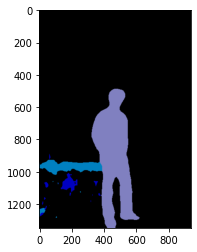

In [37]:
segvalues, output = model.segmentAsPascalvoc(img_path)

for class_id in segvalues['class_ids']:
    print(LABEL_NAMES[class_id])
    
plt.imshow(output)
plt.show()

이 사진에서는 좌측에 있는 의자와 테이블까지 추출해 내었다.  
하지만 아쉽게도 그 정확도는 좀 떨어졌다.    
사실 사람도 대충 보면 잘 안보일 것 같은데 인식했다는 것 만으로 대단하다고 본다.  

In [38]:
colormap = np.zeros((256, 3), dtype = int)
ind = np.arange(256, dtype=int)

for shift in reversed(range(8)):
    for channel in range(3):
        colormap[:, channel] |= ((ind >> channel) & 1) << shift
    ind >>= 3

colormap.shape

(256, 3)

In [39]:
colormap[15]

array([192, 128, 128])

(1348, 938)


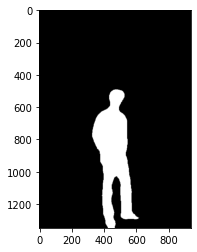

In [57]:
seg_color = (128,128,192)

seg_map = np.all(output==seg_color, axis=-1)
print(seg_map.shape)

plt.imshow(seg_map, cmap='gray')
plt.show()

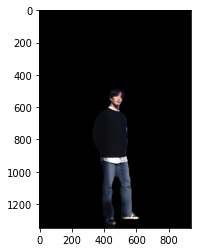

In [60]:
img_show = img_orig.copy()

# True과 False인 값을 각각 255과 0으로 바꿔줍니다
img_mask = seg_map.astype(np.uint8) * 255
img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR)
img_ex = cv2.bitwise_and(img_orig, img_mask_color)

plt.imshow(cv2.cvtColor(img_ex, cv2.COLOR_BGR2RGB))
plt.show()

배경은 내가 바다에 가고 싶으므로 바다 사진을 쓸 것이다,


(420, 634, 3)


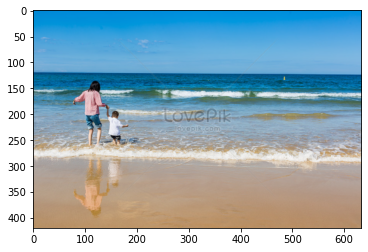

In [41]:
print(back_img_orig.shape)


plt.imshow(cv2.cvtColor(back_img_orig, cv2.COLOR_BGR2RGB))
plt.show()

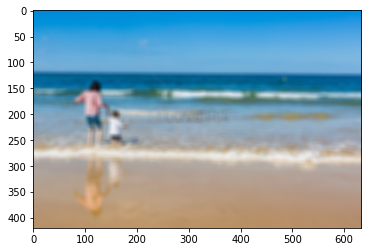

In [42]:
back_img_orig_blur = cv2.blur(back_img_orig, (10,10))  
plt.imshow(cv2.cvtColor(back_img_orig_blur, cv2.COLOR_BGR2RGB))  
plt.show()

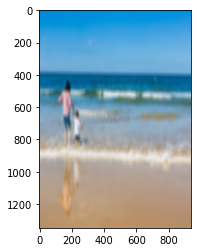

In [43]:
resized_back = cv2.resize(back_img_orig_blur, dsize=(938, 1348), interpolation=cv2.INTER_AREA)
plt.imshow(cv2.cvtColor(resized_back, cv2.COLOR_BGR2RGB))  
plt.show()


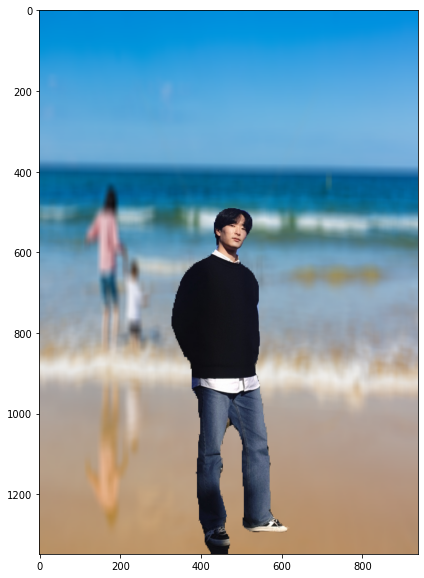

In [62]:
bg_img_orig= np.where(img_ex==0,resized_back,img_ex).astype(np.uint8)

cv2.imwrite('chromaKey.jpg', bg_img_orig)

plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(bg_img_orig, cv2.COLOR_BGR2RGB))
plt.show()

## 2-4.문제점 확인 및 해결방안 도출

### 블러 처리 시 생기는 경계선 제거

(1299, 1050, 3)


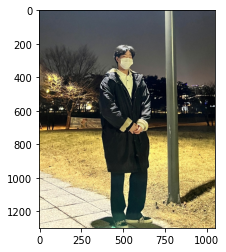

In [63]:
img_path = os.getenv('HOME')+'/aiffel/workplace/[E-07]/human_segmentation/images/me.jpg'  
img_orig = cv2.imread(img_path) 

print(img_orig.shape)

plt.imshow(cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB))
plt.show()

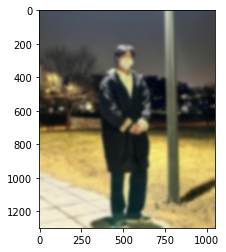

In [85]:
img_orig_blur = cv2.GaussianBlur(img_orig, (51, 51),0)
plt.imshow(cv2.cvtColor(img_orig_blur, cv2.COLOR_BGR2RGB))  
plt.show()

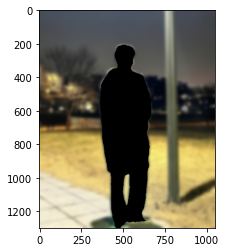

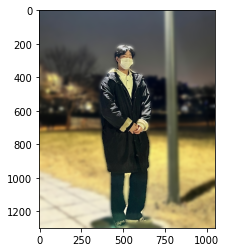

In [86]:
img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR)
img_bg_mask = cv2.bitwise_not(img_mask_color)
img_bg_blur = cv2.bitwise_and(img_orig_blur, img_bg_mask)
plt.imshow(cv2.cvtColor(img_bg_blur, cv2.COLOR_BGR2RGB))
plt.show()

img_concat = np.where(img_mask_color==255, img_orig, img_bg_blur)
plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
plt.show()

가우시안 블러를 사용하면, 이전의 배경에서 보였던 검정 테두리가 사라짐을 확연히 구별할 수 있다

<img src='./human_segmentation/images/error3.PNG'></img>


# 3. POTG
## 3-1. 소감

#### " 🤷‍♂️ OpenCV 메서드가 이렇게 중요합니다 여러분,, 기초를 다지세요,, "
PixelLib 에서 제공해주는 Sementic Segmentation의 원리도 이유도 알겠지만, 그걸 사용할 openCV 라이브러리의 이해가 많이 부족함을 느꼈습니다. 랍스타의 손질법은 알고 있지만 냄비와 찜기를 사용하는 방법을 모르는 느낌..

오늘 뿐만이 아닙니다. OpenCV 뿐만 아니라 데이터 전처리 시 무지하게 쓰이는 Pandas, 로컬 데이터를 불러올 수 있게 해주는 OS, 그리고 NLP 전반에 쓰이는 정규표현식에 대한 이해가 부족하면 모든 프로젝트가 고비로 다가옵니다. 기초를 꼭 꼭 다질 수 있도록 합시다!!

## 3-2. 어려웠던 점과 극복방안

- Pixel Library 의 한계 - Label 다양성의 부족  

내가 기타를 치는 장면을 큰 콘서트장의 배경에 올리고 싶었지만, 할 수 없었다,  
내가 들고 있는 기타에 대해 모델이 인식하지 못했기 때문이다.  

<img src='./human_segmentation/images/error.PNG'></img>

제공하고 있는 Pixel Lib 의 Label 중에서는 guitar 에 대한 내용이 없으니 인식할 수 없는 것이다.  

- 다른 크기를 가진 사진의 합성

배경 크로마키를 진행할 때 다른 사이즈를 가진 사진끼리는 합성이 안돼 곤란했다.
그래서 이것저것 뻘짓을 했는데, 막 copyTo 메서드도 쓰고 그랬는데
우리가 예전에 진행했던 수염 붙이기 에서 사용한 np.where 메서드를 사용했다.

<img src='./human_segmentation/images/error2.PNG'></img>

- 가우시안 블러 적용 시 메서드 이해

배경의 가우시안 블러처리 시 사용하는 cv2.GaussianBlur 메서드에서
블러 강도를 사용하는 사이즈에는 꼭 홀수가 들어가야 한다고 한다.


## 3-3. 추후

소감에 밝혔듯이 Computer Vision 분야에서는 OpenCV 라이브러리의 이해를 필수로 가져가야 합니다.  
이에 더해 파이썬 이용 노하우를 더 올리도록 하겠습니다!